<a href="https://colab.research.google.com/github/developer22-university/CyberBullying_on_Twitter/blob/main/ML_Notebook/new_cyber_bullying_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk import corpus
import nltk.corpus as Corpus
# from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")
STOPWORDS = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib



#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that ge

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Importing the [Kaggle](https://www.kaggle.com/mrmorj/hate-speech-and-offensive-language-dataset)  Dataset**

In [46]:
df = pd.read_csv(r"C:\Users\karthik\Downloads\CyberBullying_on_Twitter-main\CyberBullying_on_Twitter-main\data\primary_data.csv",index_col=[0])
df.head(6)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [49]:
dt_trasformed = df[['class', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


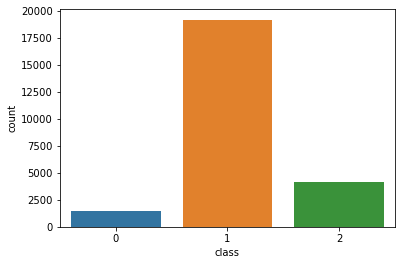

In [50]:
sns.countplot(df['class'])
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


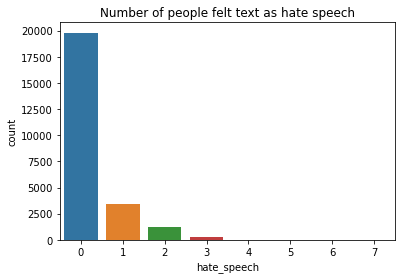

In [51]:
sns.countplot(df['hate_speech'])
plt.title('Number of people felt text as hate speech')
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


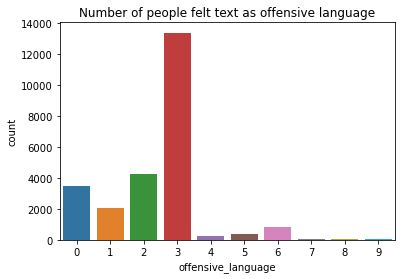

In [52]:
sns.countplot(df['offensive_language'])
plt.title('Number of people felt text as offensive language')
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


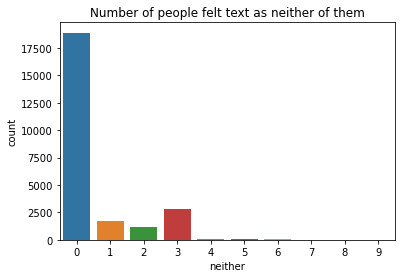

In [53]:
sns.countplot(df['neither'])
plt.title('Number of people felt text as neither of them')
plt.show()

In [54]:
def plot_dist(data):
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data,ax=ax[0])
    sns.boxplot(data,ax=ax[1])
    plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


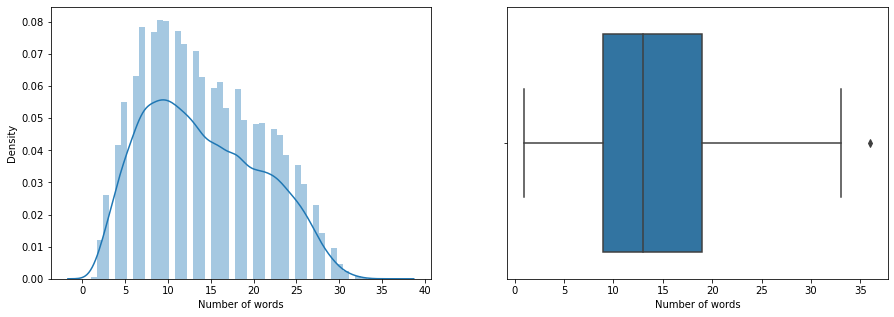

In [55]:
# number of words
df['Number of words'] = df['tweet'].apply(lambda x: len(x.split(' ')))
plot_dist(df['Number of words']);



C:\Users\karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


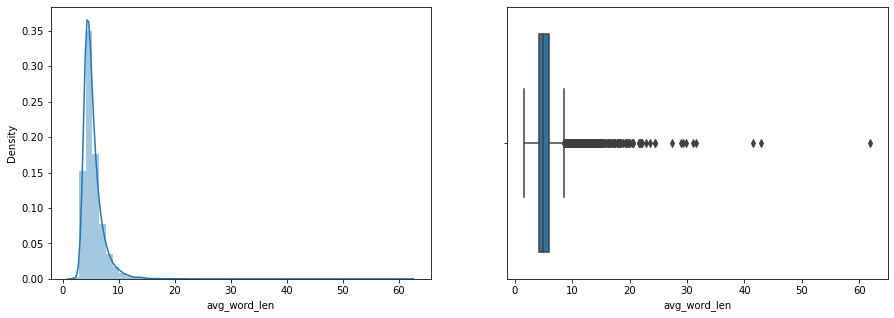

In [56]:
# average word length
df['avg_word_len'] = df['tweet'].apply(lambda x: np.mean([len(c) for c in  x.split(' ')]))
plot_dist(df['avg_word_len']);

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


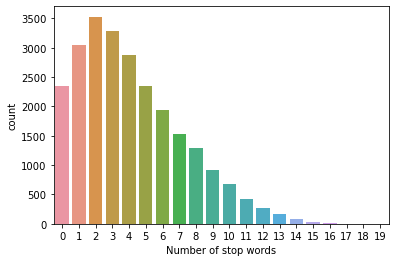

In [57]:
# number of stopwords
df['Number of stop words'] = df['tweet'].apply(lambda x: len([c for c in x.split(' ') if c in STOPWORDS]))
sns.countplot(df['Number of stop words'])
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


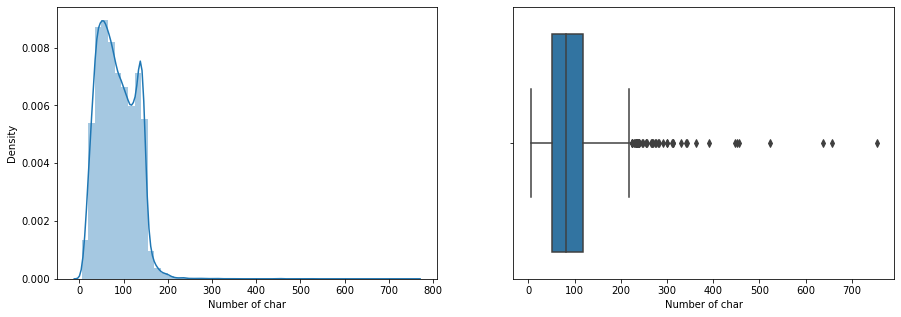

In [58]:
# number of character count
df['Number of char'] = df['tweet'].apply(lambda x: len(x))
plot_dist(df['Number of char']);

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


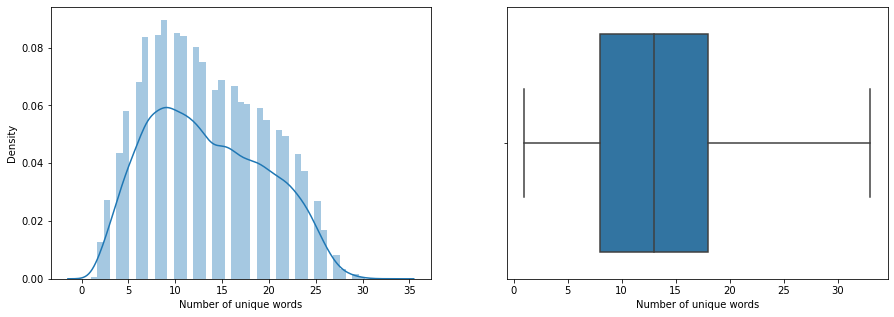

In [59]:
# number of unique
df['Number of unique words'] = df['tweet'].apply(lambda x: len(set(x.split(' '))))
plot_dist(df['Number of unique words']);

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


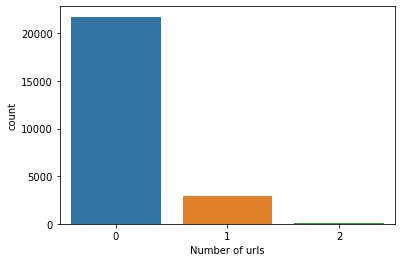

In [60]:
# number of urls
df['Number of urls'] = df['tweet'].apply(lambda x: len(re.findall('https?',x)))
sns.countplot(df['Number of urls'])
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


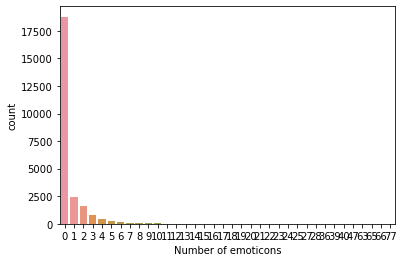

In [61]:
# number of emoticons
df['Number of emoticons'] = df['tweet'].apply(lambda x: len(re.findall('&#[0-9]+;',x)))
sns.countplot(df['Number of emoticons'])
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


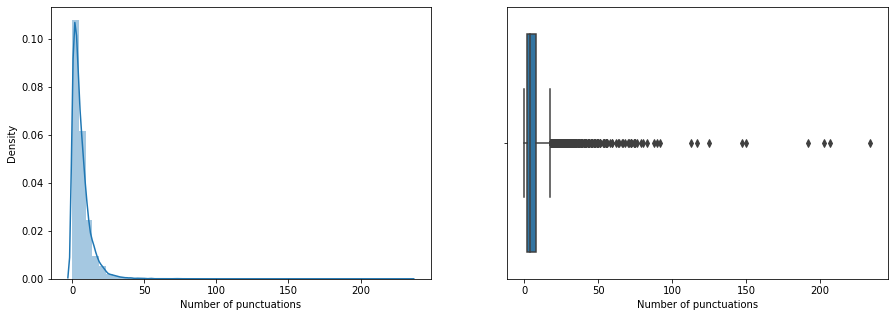

In [62]:
# number of punctuations
df['Number of punctuations'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
plot_dist(df['Number of punctuations']);

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


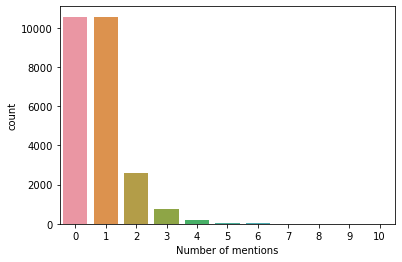

In [63]:
# number of mentions
df['Number of mentions'] = df['tweet'].apply(lambda x: len(re.findall('@',x)))
sns.countplot(df['Number of mentions'])
plt.show()

C:\Users\karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of hashtags', ylabel='count'>

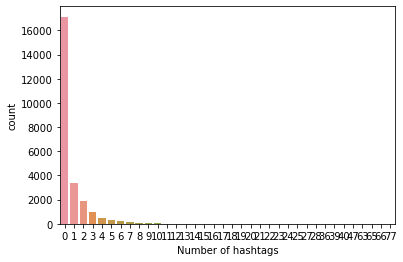

In [64]:
# number of hastags
df['Number of hashtags'] = df['tweet'].apply(lambda x: len(re.findall('#',x)))
sns.countplot(df['Number of hashtags'])

**Encoding the Dependent Variable**

In [65]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


I separated this y in two variables that we will use to fit hate speech models and offensive speech models

In [66]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]


# **Cleaning the texts**

In [67]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]


In [68]:
corpus=df['tweet']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

# **Splitting the dataset into the Training set and Test set**

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size = 0.30, random_state = 0)

# ***Finding the best models to predict hate speech***



**Decision Tree**

In [70]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**KNN**

In [71]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

**Logistic Regression**

In [72]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Random Forest Classifier**

In [73]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**SVM Classifier**


In [74]:
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, y_train)

SVC()

**XGBoost Classifier**

In [75]:
classifier_xgb= XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

**Stochastic Gradient Classifier**

In [76]:
classifier_sgd= SGDClassifier()
classifier_sgd.fit(X_train, y_train)

SGDClassifier()

**Adaboost Classifier**

In [77]:
classifier_ab= AdaBoostClassifier()
classifier_ab.fit(X_train, y_train)


AdaBoostClassifier()

**Making the Confusion Matrix for each model**

In [78]:
#KNN
y_pred_knn = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[6927   81]
 [ 369   58]]


In [79]:
#XGBoost Classifier
y_pred_xgb = classifier_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[6949   59]
 [ 355   72]]


In [80]:
#SVM
y_pred_svm = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[7007    1]
 [ 425    2]]


In [81]:
#Logistic Regression
y_pred_lr=classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6920   88]
 [ 339   88]]


In [82]:
#Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[6788  220]
 [ 315  112]]


In [83]:
#Random Forest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


[[6990   18]
 [ 410   17]]


In [84]:
#Stochastic Gradient 
y_pred_sgd=classifier_sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6920   88]
 [ 339   88]]


In [85]:
#Ada Boost
y_pred_ab=classifier_ab.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6920   88]
 [ 339   88]]


In [ ]:
rf_score = accuracy_score(y_test, y_pred_rf)
knn_score = accuracy_score(y_test, y_pred_knn)
svm_score = accuracy_score(y_test, y_pred_svm)
xgb_score = accuracy_score(y_test, y_pred_xgb)
lr_score = accuracy_score(y_test, y_pred_lr)
dt_score = accuracy_score(y_test, y_pred_dt)

sgd_score = accuracy_score(y_test, y_pred_sgd)
ab_score = accuracy_score(y_test, y_pred_ab)


print('Random Forest Accuracy: ', str(rf_score))
print('K Nearest Neighbours Accuracy: ', str(knn_score))
print('Support Vector Machine Accuracy: ', str(svm_score))
print('XGBoost Classifier Accuracy: ', str(xgb_score))
print('Logistic Regression Accuracy: ',str(lr_score))
print('Decision Tree Accuracy: ', str(dt_score))

print('Stochastic Gradient Classifier Accuracy: ', str(sgd_score))
print('AdaBoost Classifier Accuracy: ', str(ab_score))

In [ ]:
results.reset_index(drop = True)

In [ ]:
results.describe().loc[['min', 'max'], :]

In [ ]:
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

So XGBoost Classifier looks better to predict hate speech based on this dataset. It's important to emphasize Random Forest, AdaBoost, KNN and Decision Tree had great results as well. This Dataset looks like a product of artificial intelligence to classify hate and offensive speech.

In [ ]:
#Now finally saving the model with XGB Classifier.
import joblib
joblib.dump(classifier_xgb, 'hatespeech.pkl')

In [88]:
from sklearn.metrics import classification_report
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_rf, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      7008
     class 1       0.49      0.04      0.07       427

    accuracy                           0.94      7435
   macro avg       0.72      0.52      0.52      7435
weighted avg       0.92      0.94      0.92      7435



In [89]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      7008
     class 1       0.42      0.14      0.20       427

    accuracy                           0.94      7435
   macro avg       0.68      0.56      0.59      7435
weighted avg       0.92      0.94      0.92      7435



In [90]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_svm, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      7008
     class 1       0.67      0.00      0.01       427

    accuracy                           0.94      7435
   macro avg       0.80      0.50      0.49      7435
weighted avg       0.93      0.94      0.92      7435



In [91]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_xgb, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      7008
     class 1       0.55      0.17      0.26       427

    accuracy                           0.94      7435
   macro avg       0.75      0.58      0.61      7435
weighted avg       0.93      0.94      0.93      7435



In [92]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_lr, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      7008
     class 1       0.50      0.21      0.29       427

    accuracy                           0.94      7435
   macro avg       0.73      0.60      0.63      7435
weighted avg       0.93      0.94      0.93      7435



In [93]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.96      7008
     class 1       0.34      0.26      0.30       427

    accuracy                           0.93      7435
   macro avg       0.65      0.62      0.63      7435
weighted avg       0.92      0.93      0.92      7435



In [94]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_sgd, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.95      0.98      0.97      7008
     class 1       0.46      0.23      0.31       427

    accuracy                           0.94      7435
   macro avg       0.71      0.61      0.64      7435
weighted avg       0.93      0.94      0.93      7435



In [95]:
targets=['class 0', 'class 1']
print(classification_report(y_test, y_pred_ab, target_names=targets))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      7008
     class 1       0.55      0.16      0.25       427

    accuracy                           0.94      7435
   macro avg       0.75      0.58      0.61      7435
weighted avg       0.93      0.94      0.93      7435

